In [1]:
import pandas as pd
from pandas import DataFrame
import qeds
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import style
mpl.__version__
# Adjusting the style of matplotlib
style.use('ggplot')
from cycler import cycler
plt.style.use('ggplot')
#active plot theme
import qeds
qeds.themes.mpl_style();
import numpy as np

In [2]:
#from Wind金融数据终端; I bought the data from Taobao (a Chinese e-commerce platform). 
# The data was extracted by someone who has the eligibility to access to Wind app.
from sklearn import datasets
data,target = datasets.load_iris(return_X_y=True)
file1 = pd.read_csv('oil.csv')
file2 = pd.read_csv('Production&Export.csv', thousands=',')
crudeoil = pd.DataFrame(file1)
crudeoil = crudeoil.set_index(["Date"])
crudeoil.index=pd.to_datetime(crudeoil.index)
crudeoil["average price"]=crudeoil.mean(axis=1)
crudeoil['month']=crudeoil.index.month
production_export=pd.DataFrame(file2).set_index(["Years"])
production=production_export.iloc[:,0:4]
export=production_export.iloc[:,4:8]

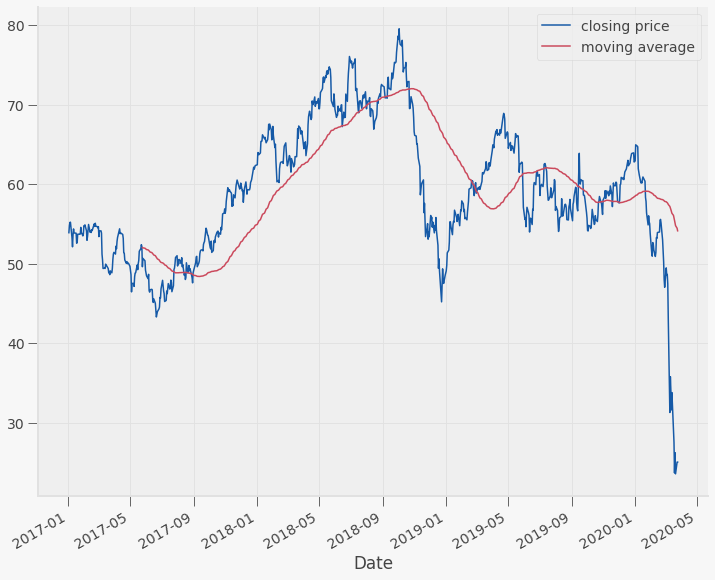

In [3]:
#calculate the Moving Average for the last 100 windows (100 days)
closing_price=crudeoil["average price"]
moving_average = closing_price.rolling(window=100).mean()
mpl.rc('figure', figsize=(12, 10))
closing_price.plot(label='closing price')
moving_average.plot(label="moving average")
plt.legend()

calculate the expected return, whiich gives a preliminary suggestion for whether to purchase these crude oil future contracts or not in different time periods .
The expected return is given by the formula
$$
r=r_{t}=\frac{P_{t}-P_{t-1}}{P_{t-1}}=\frac{P_{t}}{P_{t-1}} -1
$$

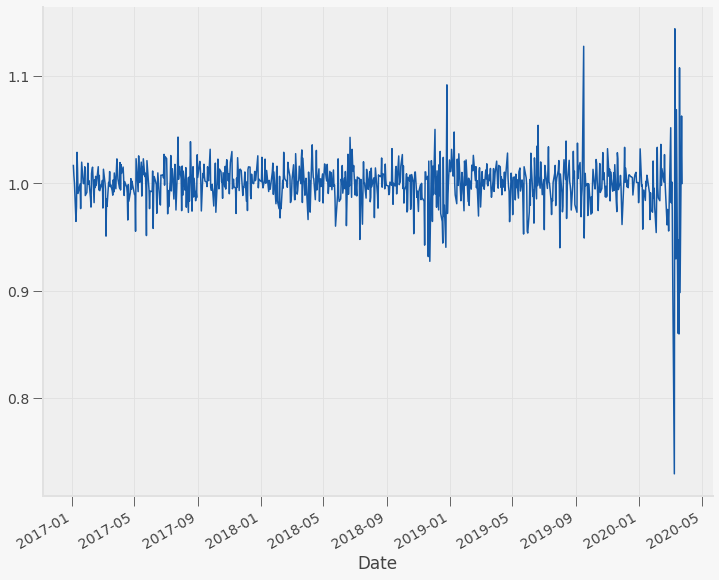

In [4]:
rets = closing_price / closing_price.shift(1) 
rets.plot(label='return')

,production,export,prices,demand
production,1.000000,0.961987,-0.385236,0.973670
export,0.961987,1.000000,-0.383511,0.970106
prices,-0.385236,-0.383511,1.000000,-0.451189
demand,0.973670,0.970106,-0.451189,1.000000


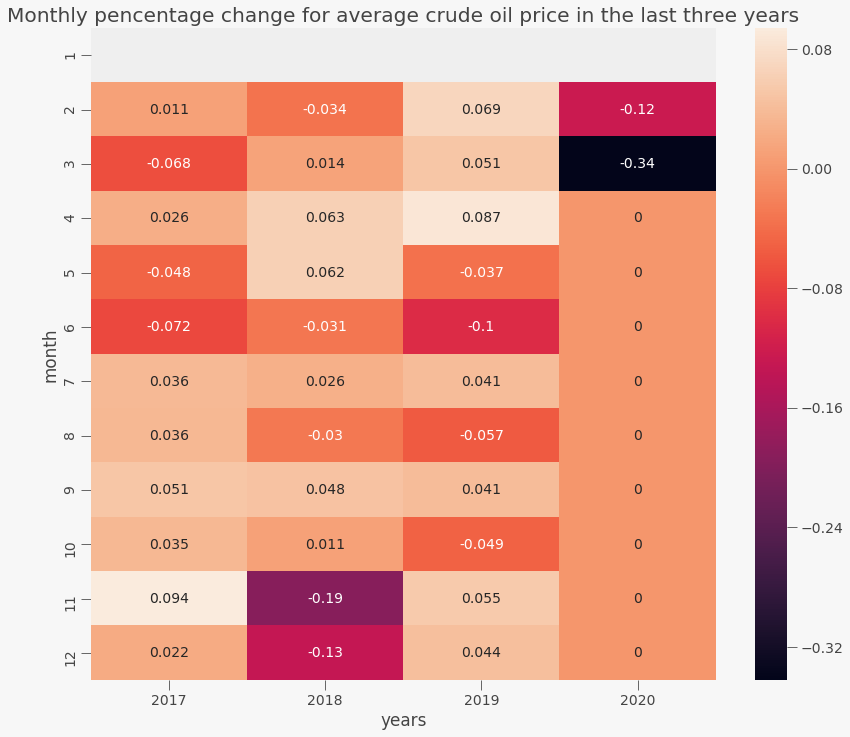

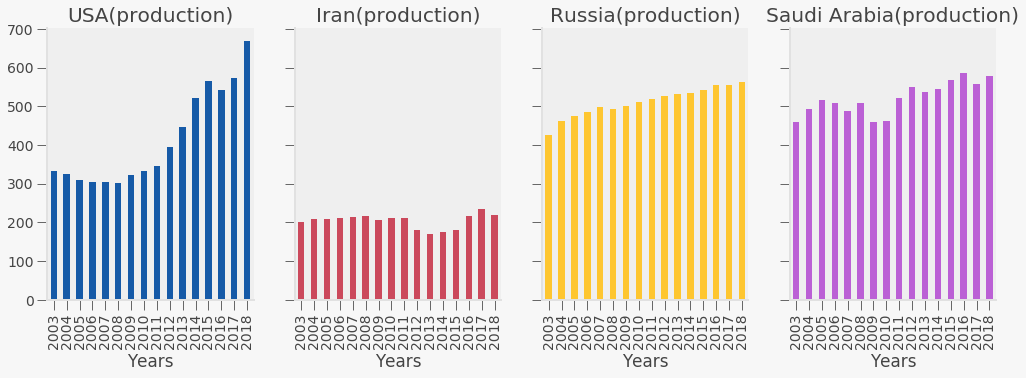

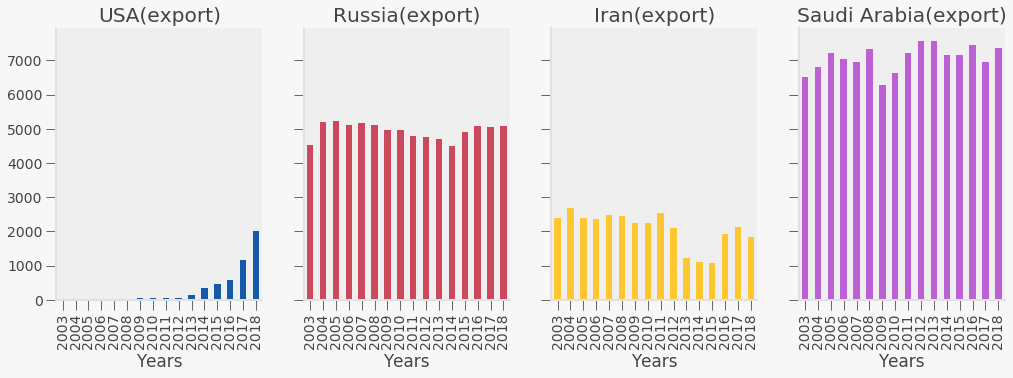

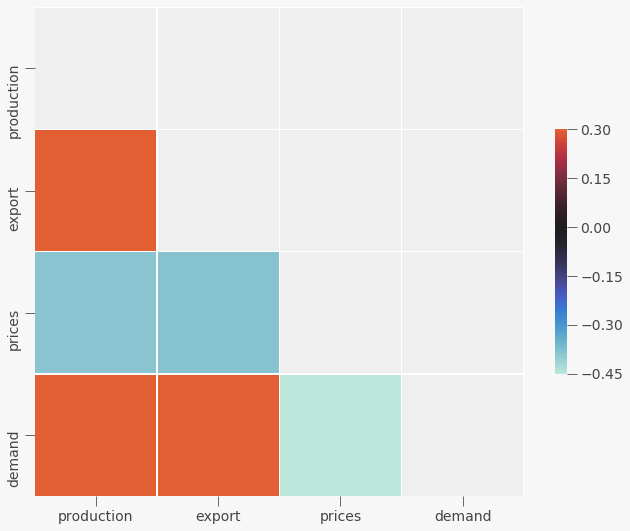

In [5]:
#averaging the closing prices in month terms
monthly_mean_2017 = crudeoil['2017'].groupby('month').mean()
monthly_mean_2018 = crudeoil['2018'].groupby('month').mean()
monthly_mean_2019 = crudeoil['2019'].groupby('month').mean()
monthly_mean_2020 = crudeoil['2020'].groupby('month').mean()

annual_list = [monthly_mean_2017, monthly_mean_2018, monthly_mean_2019, monthly_mean_2020]

average_price = pd.concat(annual_list,axis=1)
average_price=average_price["average price"]

#construct a transform into monthly percentage change
monthly_pct_change=average_price.pct_change()
monthly_pct_change.columns=['2017','2018','2019','2020']

fig,axes=plt.subplots(figsize=(14,12))
ax1=sns.heatmap(monthly_pct_change,annot=True)
ax1.set_xlabel('years')
ax1.set_title('Monthly pencentage change for average crude oil price in the last three years')

#construct bar charts  of the amount of production and exports for crude oil among the big producers(countries)
ax3=production.plot.bar(
    figsize=(17,5), subplots=True, legend=False, sharex=True,
    sharey=True, layout=(1,4),grid=False
)
ax4=export.plot.bar(
    figsize=(17,5), subplots=True, legend=False, sharex=True,
    sharey=True, layout=(1,4),grid=False
)
#The following codes serve as a preprocessing for constructing the correlation matrix
#The correlation matrix is designed to show the relationships between the variables:production, price, exports, and demand
production_5years=production.T.iloc[:,11:16].mean()
export_5years=export.T.iloc[:,11:16].mean()

#closing_prices_5years
#Since the oil prices from 2014 to 2016 and global demand data are missing in my original data set. 
# I googled the data and merged them with my original data set using pd.conccat.
average_price_2017=monthly_mean_2017['average price'].mean()
average_price_2018=monthly_mean_2018['average price'].mean()
average_price_2years=pd.Series([average_price_2017,average_price_2018],index=[2017,2018])
oil_price_2014_2016=pd.DataFrame(np.array([[93.17],[48.72],[43.58]]),index=[2014,2015,2016])
#combine the two dataframes
oil_price_2014_2018 = pd.concat([oil_price_2014_2016,average_price_2years], ignore_index=False)
oil_price_2014_2018.columns=['Closing prices']
oil_demand_2014_2018=pd.DataFrame(np.array([[92.7],[94.9],[96.2],[97.9],[99.3]]),index=[2014,2015,2016,2017,2018])
oil_demand_2014_2018.columns=["global demand"]
production_export_demand=pd.concat([production_5years,export_5years,oil_price_2014_2018,oil_demand_2014_2018],axis=1)
production_export_demand.columns=["production","export","prices","demand"]
#calculate the correlation and construct the correlation matrix
Pearson_correlation=production_export_demand.corr(method='pearson')

mask = np.triu(np.ones_like(Pearson_correlation, dtype=np.bool))

#Set up the figure size
fig, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Pearson_correlation, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#Show the dataframe used to generalize the correlation matrix
#From the correlation matrix, production,exports, and demand have strong positively correlation with each other.
#Prices and production, Prices and exports have strong negatively correlation with each other.
#Prices and demand have extremely strong negatively correlation between each other.
# For specific correlation values, please refer to the correlation dataframe shown below
#These relationships are coincide with microeconomic principles of supply and demand
Pearson_correlation

#From the heatmap'Monthly pencentage change for average crude oil price in the last three years',
#We can see that there are two periods when crude oil prices underwent a significant drop:2018.9-2019.1 and 2020.1-2020.3
#The significant drop from 2020.1-2020.3 is recgonized as 2020 Russia–Saudi Arabia oil price war
#OPEC deal collapse sparks price war: '$20 oil in 2020 is coming' 
#Oil prices are down 30% for the year as the new coronavirus, COVID-19, slashes global demand forecasts. 
#With previously-agreed OPEC+ production cuts expiring at the end of March, Saudi Arabia and Russia can theoretically pump as much crude as they want.

#From the yearly crude oil production and export bar chart shown below,
#we can see the USA's production and exports underwent a significant increase.
#The production and exports among other countries(except the USA) are basically stable

Fit model: average price = -2668.3333 + 0.0037 Date


([], <a list of 0 Text xticklabel objects>)

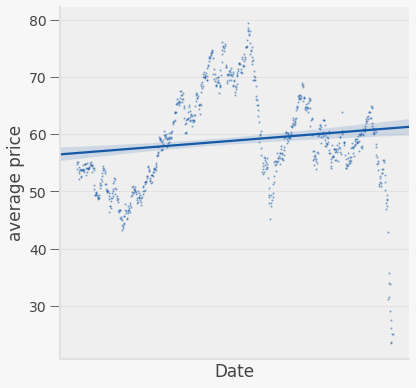

In [7]:
#construct regression analysis
#The regression analysis tecniques learned in Econ323 was applied to forcast the future crude oil prices
#To begin with, fit the complete price data with a univariate linear regression model
import seaborn as sns
import datetime as dt
from sklearn import linear_model
oil=crudeoil.reset_index()
oil['Date'] = pd.to_datetime(oil['Date'])
oil['Date']=oil['Date'].map(dt.datetime.toordinal)
y=oil['average price']
3
# construct the model instance
daily_price_model = linear_model.LinearRegression()

# fit the model
daily_price_model.fit(oil[["Date"]], y)

# print the coefficients
beta_0 = daily_price_model.intercept_
beta_1 = daily_price_model.coef_[0]

print(f"Fit model: average price = {beta_0:.4f} + {beta_1:.4f} Date")
# construct the plot
sns.lmplot(
    data=oil, x="Date", y="average price", height=6, scatter_kws=dict(s=1.5, alpha=0.35))
plt.xticks([], [])

In [44]:
#construct multivariate linear regression
#By constructing the multivariate linear regression model,we can see how the extra features changed our model.
#Two multivariate linear regression model was constructed. One model is with respect to production. Another is with respect to demand.
#The full model was generated for sake of comparison
s=production_export_demand['prices']
demand_model=linear_model.LinearRegression()
demand_model.fit(production_export_demand[["demand"]],s)
production_model=linear_model.LinearRegression()
production_model.fit(production_export_demand[["production"]],s)
full_model = linear_model.LinearRegression()
full_model.fit(production_export_demand, s)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

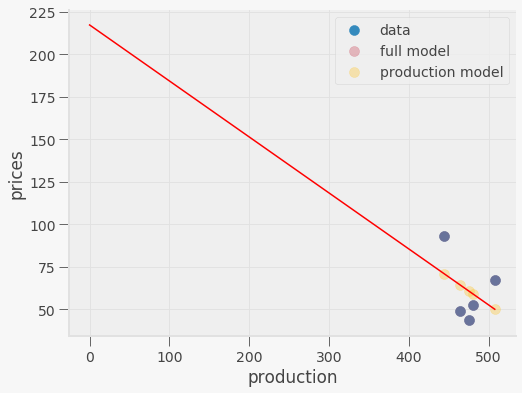

In [45]:
colors=qeds.themes.COLOR_CYCLE
def var_scatter(df, ax=None, var="production"):
    if ax is None:
        _,ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x=var , y="prices", alpha=1, s=100, ax=ax)

    return ax
ax=var_scatter(production_export_demand)
x=np.array([0,production_export_demand["production"].max()])
def scatter_model(mod, production_export_demand, ax=None, color=colors[1], x="production"):
    if ax is None:
        ax = plt.subplots()
        
    ax.scatter(production_export_demand[x], mod.predict(production_export_demand), c=color, alpha=0.35, s=100)
    return ax

scatter_model(full_model, production_export_demand, ax, color=colors[1])
scatter_model(production_model, production_export_demand[["production"]], ax, color=colors[2])
ax.legend(["data", "full model", "production model"])
beta_0 = production_model.intercept_
beta_1 = production_model.coef_[0]
ax.plot(x,beta_0+beta_1*x,color="r")

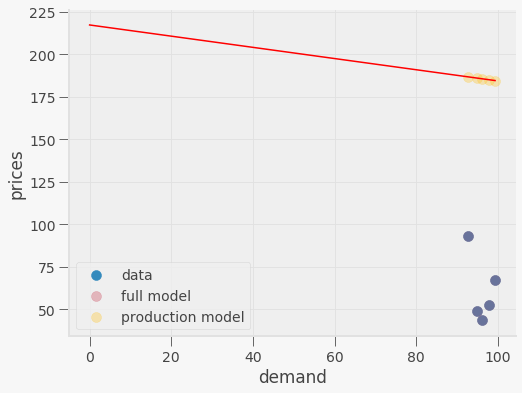

In [46]:
colors=qeds.themes.COLOR_CYCLE
def var_scatter(df, ax=None, var="demand"):
    if ax is None:
        _,ax = plt.subplots(figsize=(8, 6))
    df.plot.scatter(x=var , y="prices", alpha=1, s=100, ax=ax)

    return ax
ax=var_scatter(production_export_demand)
x=np.array([0,production_export_demand["demand"].max()])
def scatter_model(mod, production_export_demand, ax=None, color=colors[1], x="demand"):
    if ax is None:
        ax = plt.subplots()
        
    ax.scatter(production_export_demand[x], mod.predict(production_export_demand), c=color, alpha=0.35, s=100)
    return ax

scatter_model(full_model, production_export_demand, ax, color=colors[1])
scatter_model(production_model, production_export_demand[["demand"]], ax, color=colors[2])
ax.legend(["data", "full model", "production model"])
beta_0 = production_model.intercept_
beta_1 = production_model.coef_[0]
ax.plot(x,beta_0+beta_1*x,color="r")

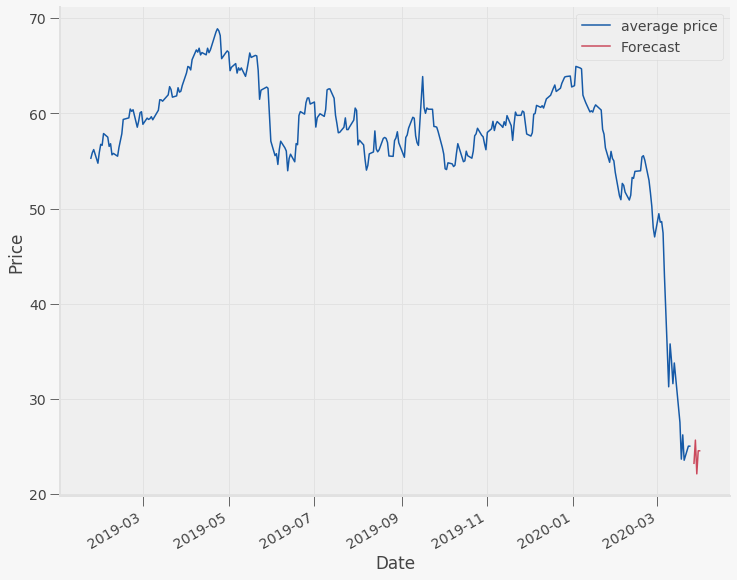

array([23.23253544, 25.67003544, 22.12316044, 24.54503544, 24.54503544])

In [50]:
import math
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#Short-run forecast
#Finally, I successfully predicted the crude oil prices in the next 5 days in the future 
#based on the historical crude oil prices using linear regression
#The blue line is the average crude oil closing prices in the last 300 days; The red line is the forecasting prices in the next five days
#based on the blue line.
#I believe it should be considered as a simple machine learning application

#5-day forecast is considered as a short run forecast.
file3 = pd.read_csv('oil.csv')
crudeoil2 = pd.DataFrame(file1)
crudeoil2 = crudeoil2.set_index(["Date"])
crudeoil2.index=pd.to_datetime(crudeoil2.index)
crudeoil2["average price"]=crudeoil2.mean(axis=1)
crudeoil2['month']=crudeoil2.index.month
#predicting the crude oil price in the future
# Drop missing value
crudeoil2.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.005 * len(crudeoil2)))
# Separating the label here
forecast_col = 'average price'
crudeoil2['label'] = crudeoil2[forecast_col].shift(-forecast_out)
X = np.array(crudeoil2.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_Lately = X[-forecast_out:]
X_train = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(crudeoil2['label'])
y_train = y[:-forecast_out]
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
last_date = crudeoil2.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=3)
forecast_set = clfreg.predict(X_Lately)
crudeoil2['Forecast'] = np.nan
for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    crudeoil2.loc[next_date] = [np.nan for _ in range(len(crudeoil2.columns)-1)]+[i]
crudeoil2['average price'].tail(300).plot()
crudeoil2['Forecast'].tail(300).plot()
plt.legend(loc=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
forecast_set
#We can see from the plot below, the crude oil price is expected to experience a tiny rise, then a decrease and then a rise in the next 5 days according to linear regression model

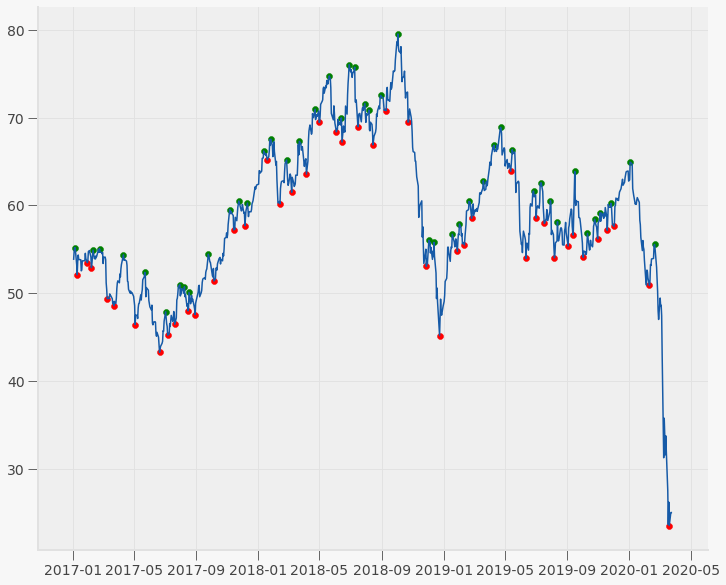

In [48]:
#Make a long-run forecast using technical analysis
#I am going to make a prediction on oil prices using technical analysis
# In tecnical analysis, the local minimums and local maximums often provide great analytics values
# Find the local maximums and local minimums of the oil prices and plot them out.
from sklearn import datasets
import pandas as pd
from scipy.signal import argrelextrema
import seaborn as sns
import datetime as dt
from sklearn import linear_model
n=5
df = pd.DataFrame(crudeoil["average price"])
# number of points to be checked before and after 
# Find local peaks
np.warnings.filterwarnings('ignore')
df['min'] = df.iloc[argrelextrema(df.values, np.less_equal, order=n)[0]]['average price']
df['max'] = df.iloc[argrelextrema(df.values, np.greater_equal, order=n)[0]]['average price']
df_tail=df.tail(220)
# Plot results
plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['average price'])
plt.show()

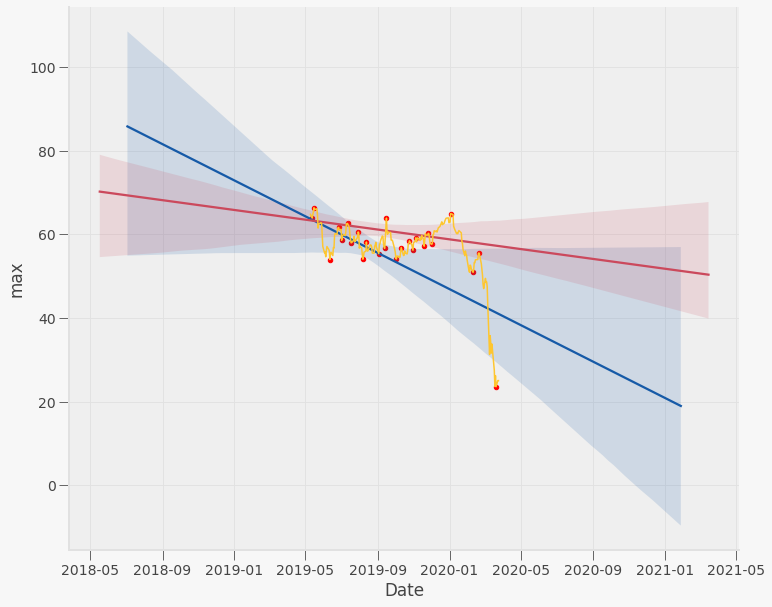

In [49]:
#construct linear regression analysis based on local maximums and local minimums
#Using the regression tecniches, two important lines was abtained: the supporting line and blocking line
tecnical_recently_min=df["min"].tail(220)
tecnical_recently_max=df["max"].tail(220)
tecnical_recently_max=tecnical_recently_max.dropna()
tecnical_recently_min=tecnical_recently_min.dropna()
s1=tecnical_recently_min.index
s2=tecnical_recently_max.index
tecnical_recently_min=pd.DataFrame(tecnical_recently_min)
tecnical_recently_max=pd.DataFrame(tecnical_recently_max)
tecnical_recently_min=tecnical_recently_min.reset_index()
tecnical_recently_max=tecnical_recently_max.reset_index()
tecnical_recently_min['Date'] = pd.to_datetime(tecnical_recently_min['Date'])
tecnical_recently_max['Date'] = pd.to_datetime(tecnical_recently_max['Date'])
tecnical_recently_min['Date']=tecnical_recently_min['Date'].map(dt.datetime.toordinal)
tecnical_recently_max['Date']=tecnical_recently_max['Date'].map(dt.datetime.toordinal)
sns.regplot(
    data=tecnical_recently_min, x="Date", y="min", scatter_kws=dict(s=20, alpha=1, color="red"),fit_reg=True)
sns.regplot(
    data=tecnical_recently_max, x="Date", y="max", scatter_kws=dict(s=20, alpha=1, color="red"),fit_reg=True)
# plt.xticks([], [])
plt.plot(df_tail.index, df_tail['average price'])
plt.show()
#The theoretical support for percentage retracements in tecnical analysis is as follows, 
#which is quoted from Technical Analysis of the Financial Markets: A Comprehensive Guide to Trading Methods and Applications by John J.Murphy
#"In all of the previous examples of uptrends and downtrends, the
# reader has no doubt noticed that after a particular market move,
# prices retrace a portion of the previous trend before resuming the
# move in the original direction. These countertrend moves tend to
# fall into certain predictable percentage parameters. The best
# known application of the phenomenon iS the retracement.
# Let's say, for example, that a market is trending higher and trav-
# els from the 100 level to the 200 level. Very often, the subsequent
# reaction retraces about half of the prior -move, to about the 150
# level, before upward momentum is regained. This is a very well-
# known market tendency and happens quite frequently. Also,
# these percentage retracements apply to any degree of trend—
# major, secondary, and near term.
# Besides the retracement, there are minimum and max-
# imum percentage parameters that are also widely recognized—the
# one-third and the two-thirds retracements. In other words, the price
# trend can be divided into thirds. Usually, a minimum retracement
# is about 33% and a maximum about 66%. What this means is that,
# in a correction of a strong trend, the market usually retraces at least
# a third of the previous move. This is very useful information for a
# number of reasons. If a trader is looking for a buying area under
# the market, he or she can just compute a 33-5096 zone on the chart
# and use that price zone as a general frame Of reference for buying
# opportunities.

#According to the interpretations raised above. the market is likely to behave a 33% to 66% retracement.
#From the picture below, we can see the crude oil market underwent a falling tendency. Thus, we choose to use local minimums and the supporting line to conduct the retracement analysis
#Apply the 33%-66% retracement theorem, the oil price is likely to retrace into the interval[31.4,39.3] dollor/barrel
#Thus, the long run forecast of crude oil price is the price is likely to retrace into the interval [31.4,39.3] dollor/barrel in the next few months.

## summary
1. In this final project, I generated serveral data visulization on crude oil prices, oil production, demand,export.etc
 
2. I constructed a correlation matrix to find the relationships among price, production.demand, export.
 
3. I made a prediction of the future oil prices' possible tendency in both short run and long run
 
4. For short run prediction, I fitted the histotical data into linear regression model and get the next five days' predicted prices.
  
5. For long run prediction, I conducted a tecnical analysis using the retracement principle raised by John Murpy in his book Technical Analysis of the Financial Markets

6. The currently global covid-19 situation is damaging the global economy and crude oil market also isn't immune from the big picture.

7. geopolitics and Internal affairs of oil-producing countries also plays an important role in determining the crude oil prices, like the battle for the Saudi crown.

8. OPEC, allies agree to cut oil output by record amount. OPEC, Russia and other oil-producing countries, collectively known as OPEC+, have reached a tentative deal to cut oil output by 9.7 million barrels a day due to the coronavirus pandemic. Thus, the crude oil price is expected to rise in the fowllwing few months since the oil output is expected to decrease by the OPEC's new deal.

## Limitations
The crude oil market is actually too complicated. There are massive factos can affect crude oil's price, like the current global covid-19 situation and  It's way tedious and tough to include all the factos in this final project. I will keep this project as long run project and will improve it gradually.